In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [8]:
des_emp=df['no_of_employees'].describe()
des_emp

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [19]:
a=5667.043210-(1*22877.928848)
b=5667.043210+(1*22877.928848)
a,b

(-17210.885638, 28544.972058)

In [20]:
con1=df['no_of_employees']>a
con2=df['no_of_employees']<b
con=con1&con2
len(df[con])

24674

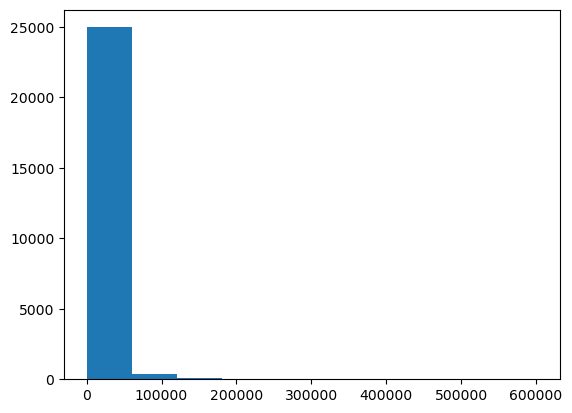

In [14]:
plt.hist(df['no_of_employees'])
plt.show()

In [15]:
con3=df['no_of_employees']>=-2.600000e+01
con4=df['no_of_employees']<6.018350e+04
cond=df[con3&con4]
len(cond)

24970

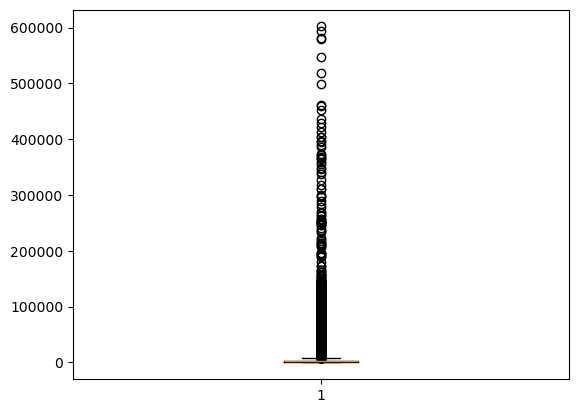

In [16]:
plt.boxplot(df['no_of_employees'])
plt.show()

In [18]:
q1=round(np.percentile(df['no_of_employees'],25),2)
q3=round(np.percentile(df['no_of_employees'],75),2)
iqr=q3-q1
q1,q3,iqr

(1022.0, 3504.0, 2482.0)

In [28]:
LB=q1-1.5*(iqr)
UB=q3+1.5*(iqr)
LB,UB

(-2701.0, 7227.0)

In [23]:
c1=df['no_of_employees']>LB
c2=df['no_of_employees']<UB
outliers=df[c1|c2]
non_outliers=len(df[c1&c2])
len(outliers),non_outliers


(25480, 24674)

In [26]:
median=df['no_of_employees'].median()
cond1=df['no_of_employees']<LB 
cond2=df['no_of_employees']>UB
cond=cond1|cond2
l=np.where(cond,median,df['no_of_employees'])
l
df_copy=df.copy()
df_copy['no_of_employees']=l


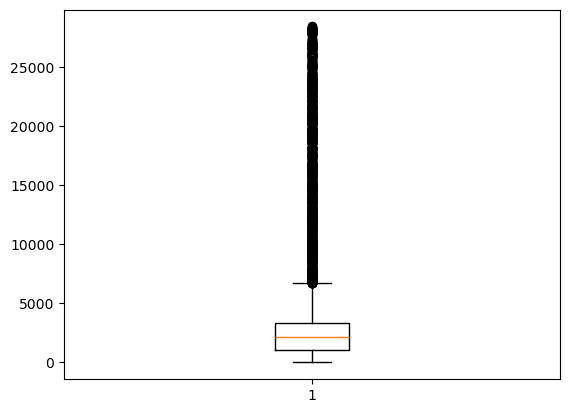

In [27]:
plt.boxplot(df_copy['no_of_employees'])
plt.show()